In [1]:
import os
from copy import deepcopy
from tqdm import tqdm
import pandas as pd
import numpy as np
import markdown
import arff
import matplotlib.pyplot as plt

plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16

In [2]:
filepath = os.path.join(os.getcwd(), 'Results on Small Data.xlsx')
sheet_name = 'Big Data'
range_dict = {
              'Yeast': {'cols': 'B:G', 'n_rows': 6, 'skip_rows': 3, 'header': 0, 'skip_cols': ['CIFDM']},
              'Birds': {'cols': 'B:F', 'n_rows': 6, 'skip_rows': 12, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']},
              'Human': {'cols': 'B:F', 'n_rows': 5, 'skip_rows': 34, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']},
              'FoodTruck': {'cols': 'B:F', 'n_rows': 6, 'skip_rows': 42, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']},
              'Enron': {'cols': 'I:N', 'n_rows': 10, 'skip_rows': 3, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']},
              'Medical': {'cols': 'I:N', 'n_rows': 10, 'skip_rows': 16, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']},
              'Eukaryote': {'cols': 'B:F', 'n_rows': 10, 'skip_rows': 21, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']},
              'CAL500':{'cols': 'I:N', 'n_rows': 20, 'skip_rows': 29, 'header': 0, 'skip_cols': ['LwF', 'CIFDM']}
              }
YTicks = [0.00, 0.25, 0.50, 0.75, 1.00]
plot_styles = {'EWC': 'b^--', 'SI': 'ko--', 'LwF': 'gs--', 'CIFDM': 'r*--', 'NIMBLE': 'mD--'}
lw = 2

In [3]:
def rename_fn(x):
    for p in plot_styles.keys():
        if x.startswith(p):
            return p
    else:
        return "Tasks"

def read_df(name):
    data_props = range_dict[name]
    header = data_props['header']
    # header = 0
    usecols = data_props['cols']
    skiprows = data_props['skip_rows']
    nrows = data_props['n_rows']
    df = pd.read_excel(filepath, sheet_name=sheet_name, header=header, usecols=usecols, skiprows=skiprows, nrows=nrows)
    df.rename(columns=rename_fn, inplace=True)
    
    for col in data_props['skip_cols']:
        if col in df.columns:
            df.drop(col, axis=1, inplace=True)
    return df

def plot_on_ax(df, ax, name):
    xvals = df['Tasks'].to_list()
    xticks = range(len(xvals))

    df = df.drop('Tasks', axis=1)

    ymax = df.to_numpy().max()

    yticks = [1.1*t*ymax for t in YTicks]
    yvals = ['{:.2f}'.format(t) for t in yticks]

    for col in df.columns:
        ax.plot(list(range(len(xvals))), df[col].to_numpy(), plot_styles[col], linewidth=lw, label=col, markersize=10)

    ax.set_xticks(xticks)
    ax.set_xticklabels(xvals, fontsize=16, rotation=90)
    # ax.set_ylim((0, 1.1*ymax))
    ax.set_yticks(yticks, yvals)
    # ax.set_yticklabels(yvals, fontsize=16)
    ax.set_ylabel('Micro av. F1', fontsize=16) 
    ax.set_title(name, fontsize=18)
    return

def get_unique_legends(axs):
    legend_entries = {}
    for ax in axs:
        handles, labels = ax.get_legend_handles_labels()
        for h, l in zip(handles, labels):
            if l not in legend_entries:  # Store unique entries only
                legend_entries[l] = h
    return legend_entries

def plot_avg_cl_figures(fig, axs, names):
    for ax, name in zip(axs, names):
        df = read_df(name)
        plot_on_ax(df, ax, name)

    legend_entries = get_unique_legends(axs)
    fig.legend(legend_entries.values(), legend_entries.keys(), loc="lower center", ncol=len(legend_entries), 
               bbox_to_anchor=(0.5, -0.1), fontsize=16)

    return

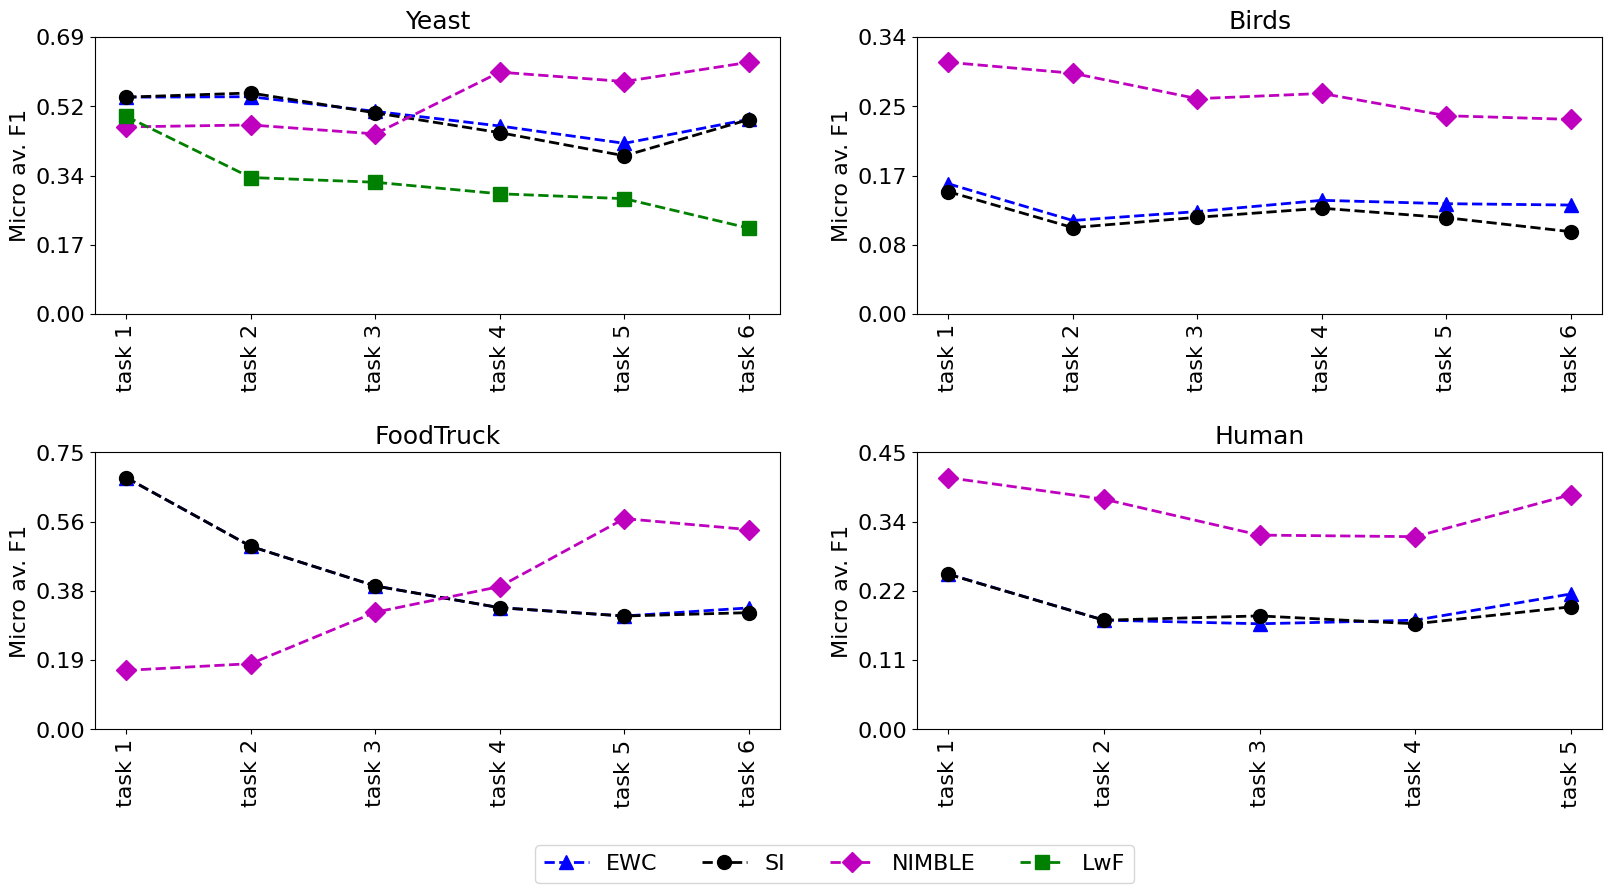

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
plt.tight_layout(rect=[0, 0.05, 1, 1])

names = [['Yeast', 'Birds'], ['FoodTruck', 'Human']]
plot_avg_cl_figures(fig, axs.flatten(), [p for l in names for p in l])

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

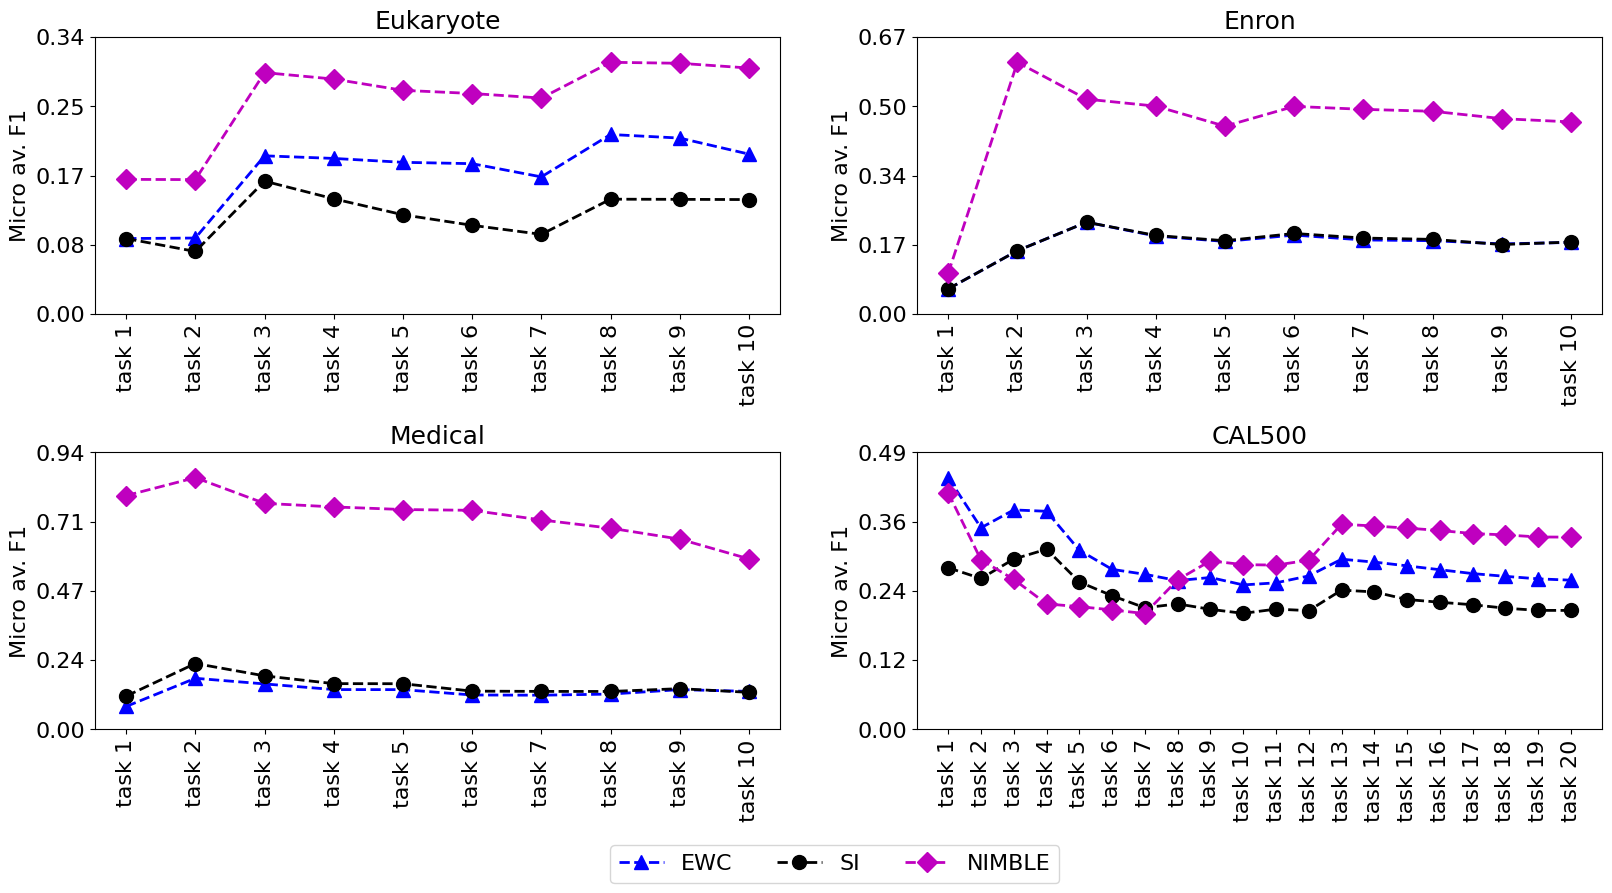

In [5]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8))
plt.tight_layout(rect=[0, 0.05, 1, 1])

names = [['Eukaryote', 'Enron'], ['Medical', 'CAL500']]
plot_avg_cl_figures(fig, axs.flatten(), [p for l in names for p in l])

plt.subplots_adjust(hspace=0.5, wspace=0.2)
plt.show()

In [6]:
Yeast_dict = {'3 tasks': {'Micro av. F1': [0.5721, 0.6511, 0.6392], 
                          'Micro av. Jaccard': [0.4091, 0.4842, 0.4698]},
              '6 tasks': {'Micro av. F1': [0.466268, 0.471094, 0.448794, 0.602669, 0.579338, 0.627247], 
                          'Micro av. Jaccard': [0.304009, 0.308125, 0.289319, 0.4313, 0.407795, 0.456926]}}

Foodtruck_dict = {'3 tasks': {'Micro av. F1': [0.5159, 0.6181 ,0.5977], 
                              'Micro av. Jaccard': [0.3597, 0.4479, 0.4267]},
                  '6 tasks': {'Micro av. F1': [0.16, 0.178218, 0.317568, 0.387352, 0.571429, 0.541586], 
                              'Micro av. Jaccard': [0.0869565, 0.0978261, 0.188755, 0.240196, 0.4, 0.371353]}}

yeast_dict = {'3 tasks': [0.5721, 0.6511, 0.6392],
              '6 tasks': [0.466268, 0.471094, 0.448794, 0.602669, 0.579338, 0.627247]}

foodtruck_dict = {'3 tasks': [0.5159, 0.6181 ,0.5977],
                  '6 tasks': [0.16, 0.178218, 0.317568, 0.387352, 0.571429, 0.541586]} 

CAL500_dict = {'5 tasks': [0.210022, 0.222222, 0.213999, 0.310154, 0.294264],
               '10 tasks': [0.188498, 0.151254, 0.142913, 0.21902, 0.255643, 0.272271, 0.337685, 0.329375, 0.321194, 0.317342],
               '15 tasks': [0.308219, 0.263393, 0.207966, 0.202819, 0.194784, 0.253485, 0.286426, 0.265799, 0.30219, 0.362343, 
                            0.354722, 0.348605, 0.342694, 0.338143, 0.336853],
               '20 tasks': [0.41449, 0.297101, 0.262958, 0.219951, 0.215098, 0.209466, 0.202993, 0.262261, 0.295455, 0.288765, 
                            0.287955, 0.296556, 0.359581, 0.356506, 0.352804, 0.34864, 0.343269, 0.340858, 0.337263, 0.33697]}

YTicks = [0.00, 0.25, 0.50, 0.75, 1.00]
plot_styles = {'3 tasks': 'b^--', '5 tasks': 'ko--', '6 tasks': 'gs--', '10 tasks': 'r*--', '15 tasks': 'mD--', '20 tasks': 'cv--'}
lw = 2
ylabel = 'Micro av. F1'
names = ['Yeast Dataset', 'FoodTruck Dataset', 'CAL500 Dataset']
dicts = [yeast_dict, foodtruck_dict, CAL500_dict]

In [15]:
def dict_max_(dict_):
    maxs = []
    for k, v in dict_.items():
        maxs.append(max(v))
    return max(maxs)

def plot_on_ax_(dict_, name_, ax_):
    ymax = dict_max_(dict_)
    yticks = [1.1*t*ymax for t in YTicks]
    yvals = ['{:.2f}'.format(t) for t in yticks]

    for k, v in dict_.items():
        xticks = range(len(v))
        xvals = ['task {}'.format(t + 1) for t in xticks]
        ax_.plot(xticks, v, plot_styles[k], linewidth=lw, label=k, markersize=10)

    ax_.set_xticks(xticks)
    ax_.set_xticklabels(xvals, fontsize=16, rotation=90)
    # ax.set_ylim((0, 1.1*ymax))
    ax_.set_yticks(yticks, yvals)
    # ax.set_yticklabels(yvals, fontsize=16)
    ax_.set_ylabel(ylabel, fontsize=16) 
    ax_.set_title(name_, fontsize=18)
    return

def plot_cl_ablation_figures():
    # Create figure and specify GridSpec
    fig = plt.figure(figsize=(12, 8))
    gs = fig.add_gridspec(2, 2, height_ratios=[1, 1])  # Two rows, two columns

    # Define subplots using GridSpec
    ax1 = fig.add_subplot(gs[0, 0])  # First row, first column
    ax2 = fig.add_subplot(gs[0, 1])  # First row, second column
    ax3 = fig.add_subplot(gs[1, :])  # Second row, spans both columns

    axs = [ax1, ax2, ax3]

    for dict_, ax_, name_ in zip(dicts, axs, names):
        plot_on_ax_(dict_, name_, ax_)

    legend_entries = get_unique_legends(axs)
    fig.legend(legend_entries.values(), legend_entries.keys(), loc="lower center", ncol=len(legend_entries), 
               bbox_to_anchor=(0.5, -0.1), fontsize=16)
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    plt.show()
    return


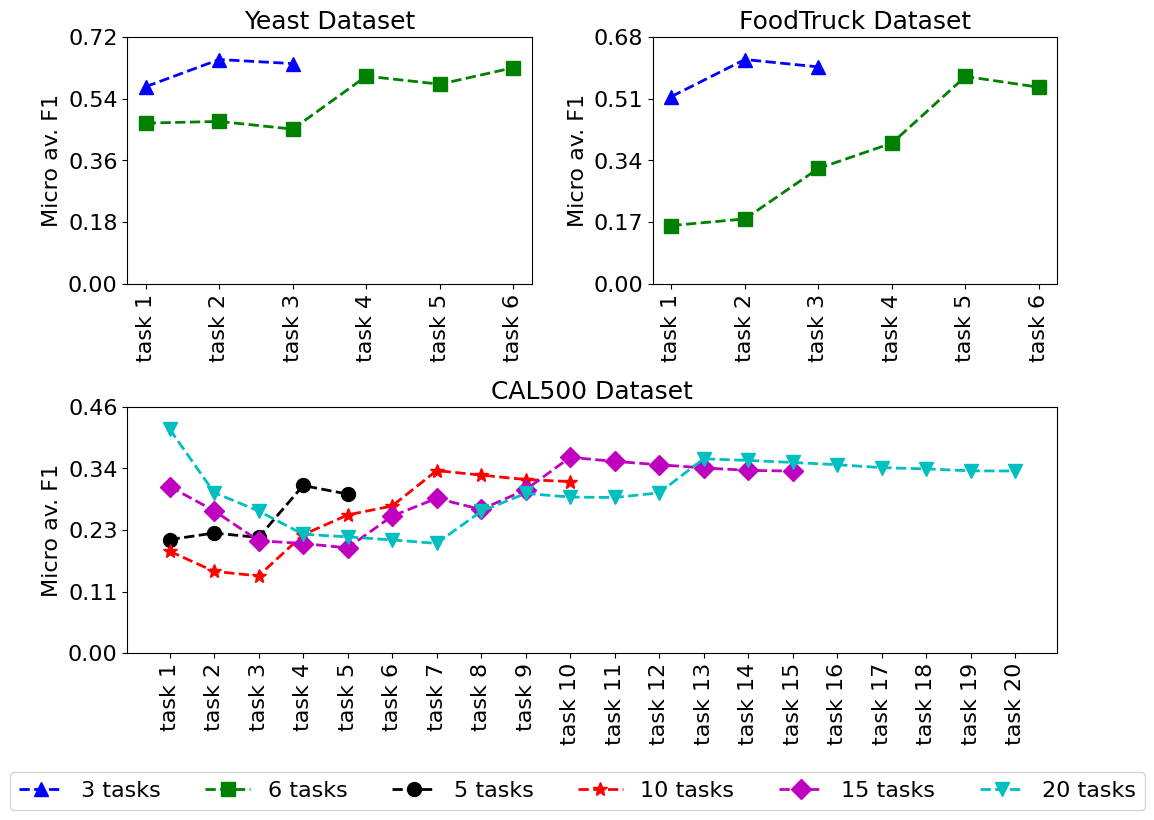

In [16]:
plot_cl_ablation_figures()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
path_fn = lambda x: os.path.join(os.getcwd(), x)

img1_path = path_fn('feat_dist_corr.png')
img2_path = path_fn('flags_spk_dist.png')
img3_path = path_fn('yeast_spk_dst.png')

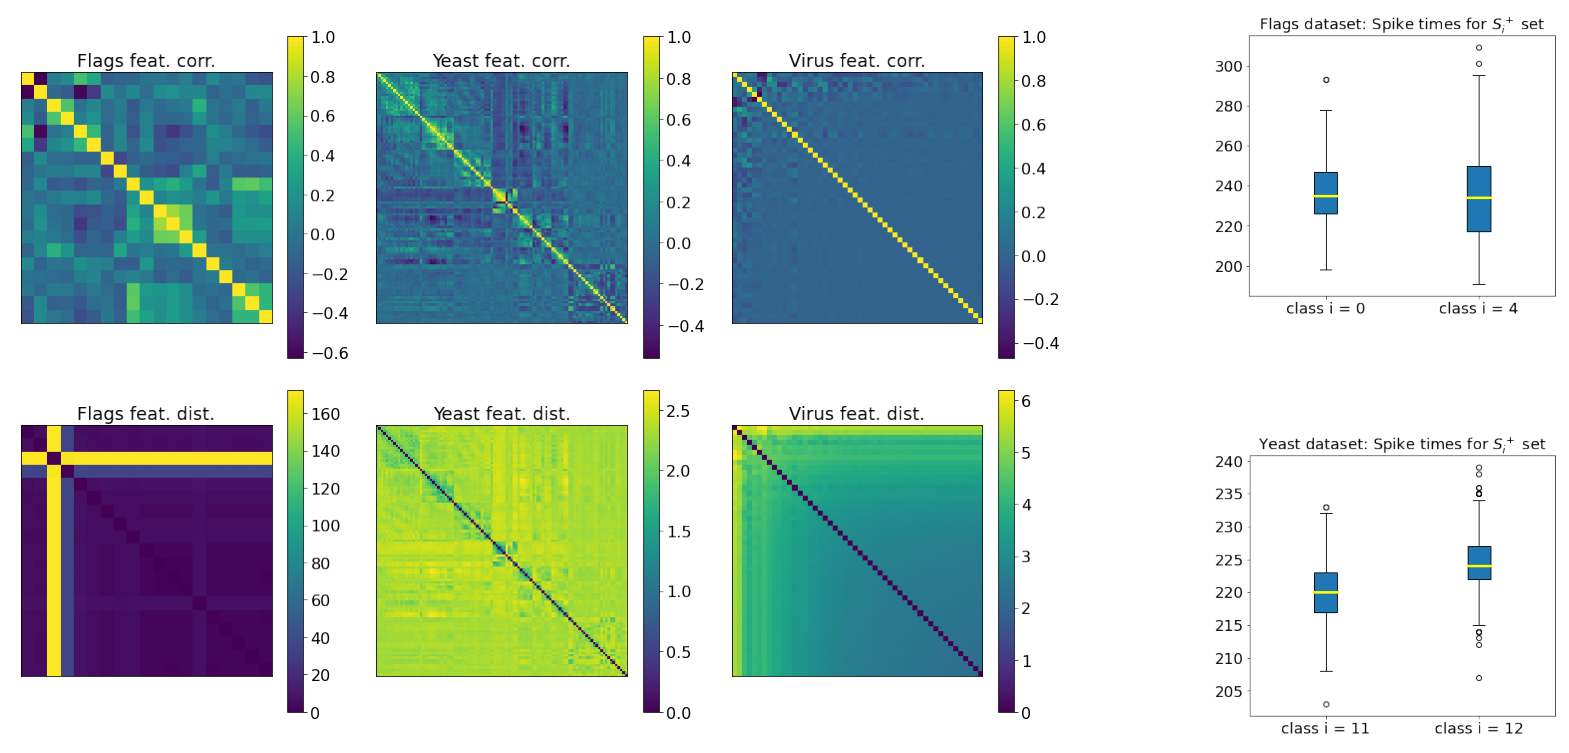

In [ ]:
fig = plt.figure(figsize=(15, 7))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[3, 1])  # Two rows, two columns
plt.tight_layout()

# Define subplots using GridSpec
ax1 = fig.add_subplot(gs[:, 0])  
ax2 = fig.add_subplot(gs[0, 1])  
ax3 = fig.add_subplot(gs[1, 1])  

im1 = plt.imread(img1_path)
ax1.imshow(im1)
ax1.set_axis_off()

im2 = plt.imread(img2_path)
ax2.imshow(im2)
ax2.set_axis_off()

im3 = plt.imread(img3_path)
ax3.imshow(im3)
ax3.set_axis_off()

plt.show()

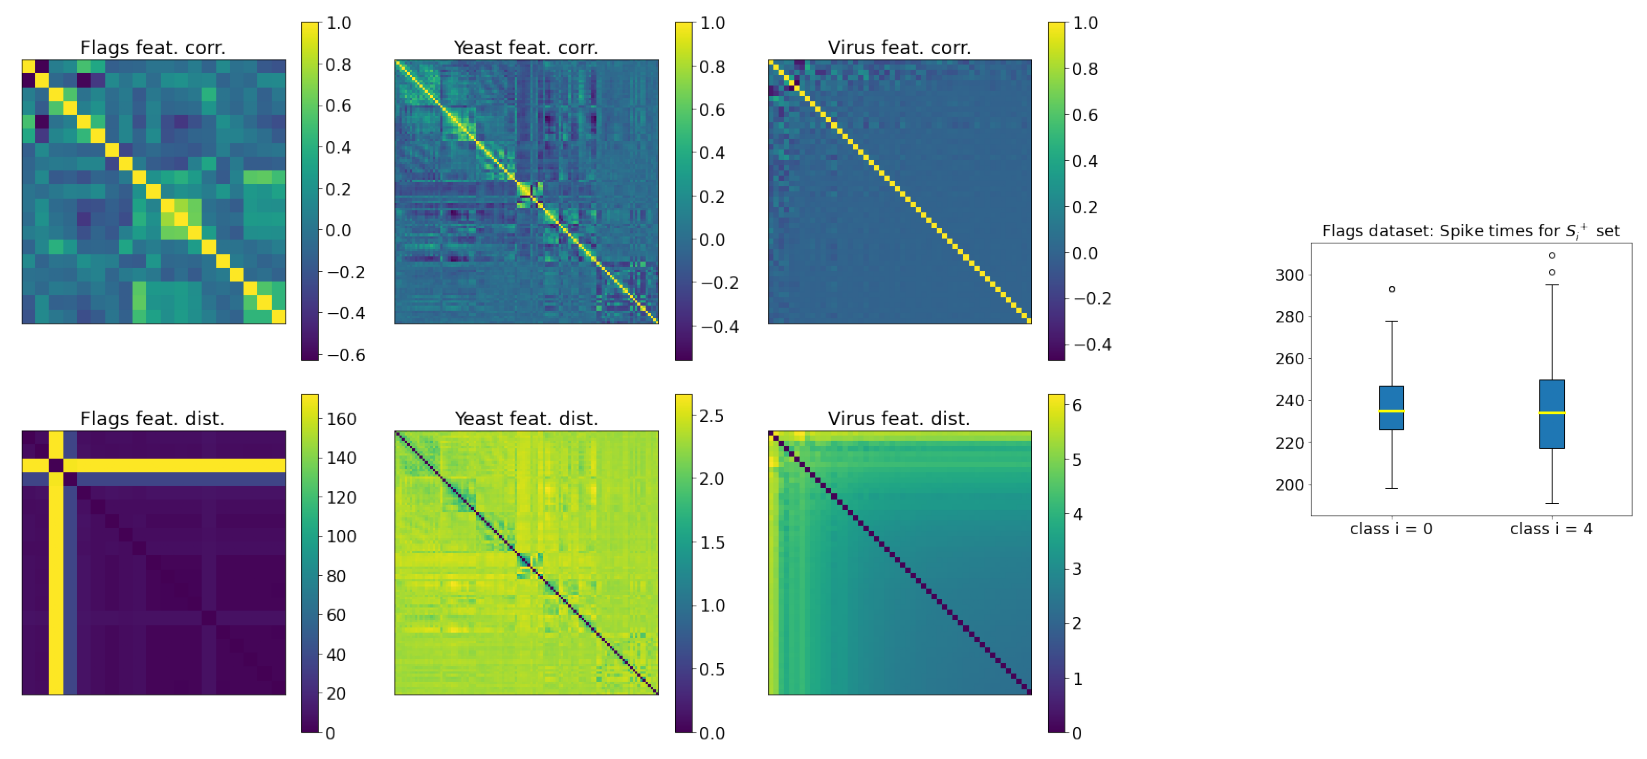

In [19]:
fig = plt.figure(figsize=(21, 15))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1])  # Two rows, two columns
plt.tight_layout()

# Define subplots using GridSpec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

im1 = plt.imread(img1_path)
ax1.imshow(im1)
ax1.set_axis_off()

im2 = plt.imread(img2_path)
ax2.imshow(im2)
ax2.set_axis_off()

plt.subplots_adjust()
plt.show()

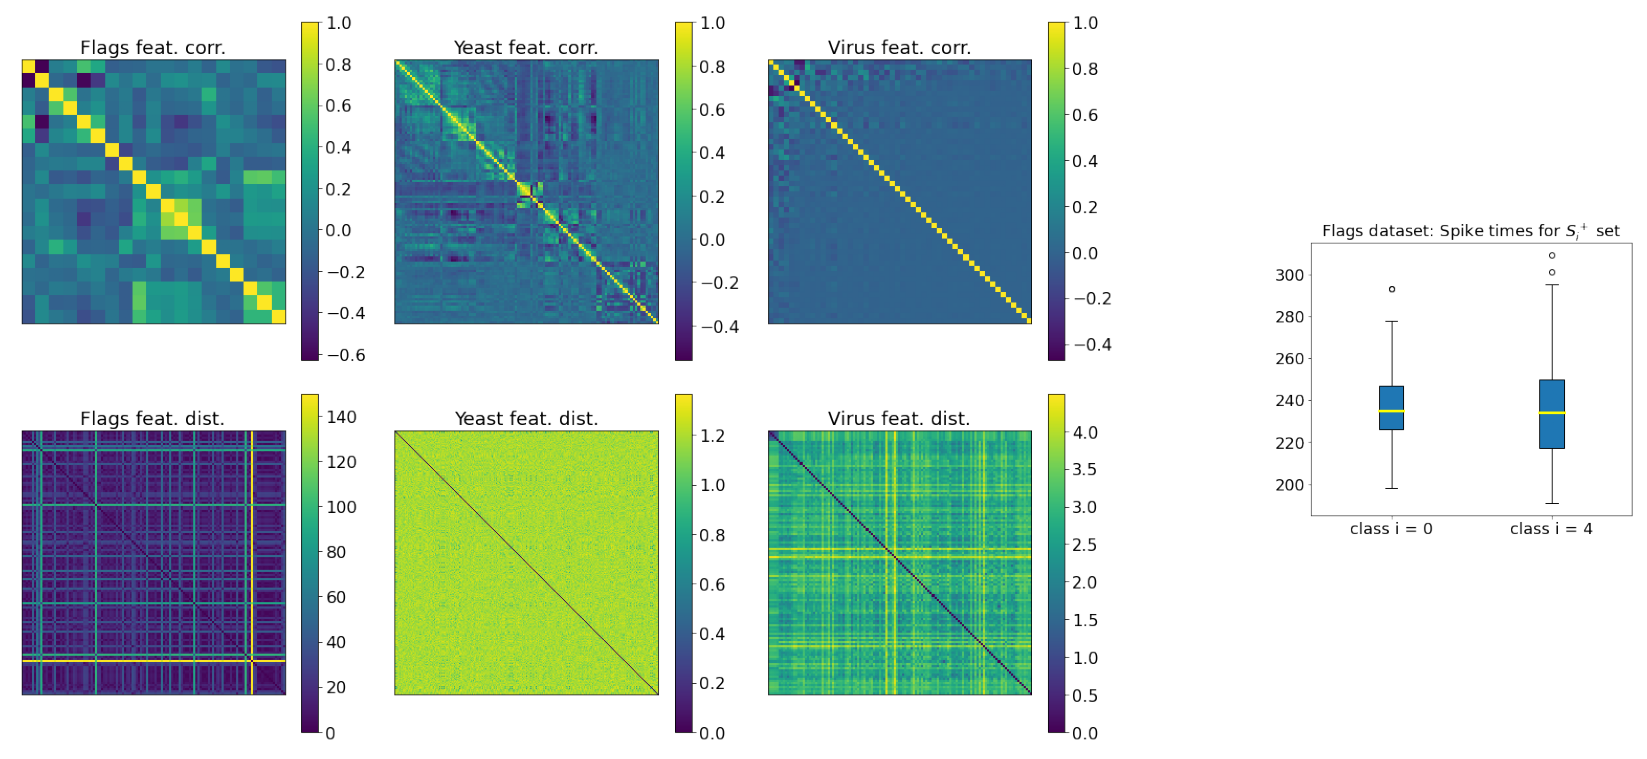

In [2]:
path_fn = lambda x: os.path.join(os.getcwd(), x)

img1_path = path_fn('feat_dist_corr_1.png')
img2_path = path_fn('flags_spk_dist.png')

fig = plt.figure(figsize=(21, 15))
gs = fig.add_gridspec(1, 2, width_ratios=[3, 1])  # Two rows, two columns
plt.tight_layout()

# Define subplots using GridSpec
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

im1 = plt.imread(img1_path)
ax1.imshow(im1)
ax1.set_axis_off()

im2 = plt.imread(img2_path)
ax2.imshow(im2)
ax2.set_axis_off()

plt.subplots_adjust()
plt.show()